We test the feed forward neural network on moons dataset generated with sklearn.

Start by importing the relevant modules

In [1]:
from multilayer_nn import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Prepare the dataset, split in train and test sets

In [2]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=0)  # X: (n_samples, 2), y: (n_samples,)
# Train/test split
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0)

Preprocessing: normalize the features and reshape in the form $(l, m)$, where $l$ is the number of features and $m$ the number of samples

In [6]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train_raw)    # shape (n_train, 2)
X_test_s   = scaler.transform(X_test_raw)

X_train = X_train_s.T.astype(np.float64)   # (2, m_train)
X_test   = X_test_s.T.astype(np.float64)     # (2, m_test)
Y_train = y_train_raw.reshape(1, -1).astype(np.float64)  # (1, m_train)
Y_test   = y_test_raw.reshape(1, -1).astype(np.float64)    # (1, m_test)

Build the model by specifying the parameters

In [7]:
model = MLPClassifier(
    layers_dims=[2, 32, 16, 1],
    activations=['relu', 'relu', 'sigmoid'],
    initialization='he',
    optimizer='adam',
    learning_rate=0.01,
    lambd=0.01,
    seed=0
)

Train the model

In [8]:
history = model.fit(
    X_train, Y_train,
    X_test=X_test, Y_test=Y_test,
    num_epochs=1000,
    mini_batch_size=32,
    learning_rate=0.01,
    print_cost=True,
    seed=0,
)

Epoch 0/1000 - train_cost: 0.480984 - test_cost: 0.383043
Epoch 100/1000 - train_cost: 0.188582 - test_cost: 0.096917
Epoch 200/1000 - train_cost: 0.130103 - test_cost: 0.072401
Epoch 300/1000 - train_cost: 0.117509 - test_cost: 0.099299
Epoch 400/1000 - train_cost: 0.102735 - test_cost: 0.080347
Epoch 500/1000 - train_cost: 0.104469 - test_cost: 0.082282
Epoch 600/1000 - train_cost: 0.117749 - test_cost: 0.081708
Epoch 700/1000 - train_cost: 0.107463 - test_cost: 0.086188
Epoch 800/1000 - train_cost: 0.105975 - test_cost: 0.069939
Epoch 900/1000 - train_cost: 0.107943 - test_cost: 0.070519


In [9]:
# print the accuracies

train_acc = model.accuracy(X_train, Y_train)
test_acc = model.accuracy(X_test, Y_test)
print(f"Train accuracy: {train_acc:.4f}, test accuracy: {test_acc:.4f}")

Train accuracy: 0.9675, test accuracy: 0.9700


Plot the training cost

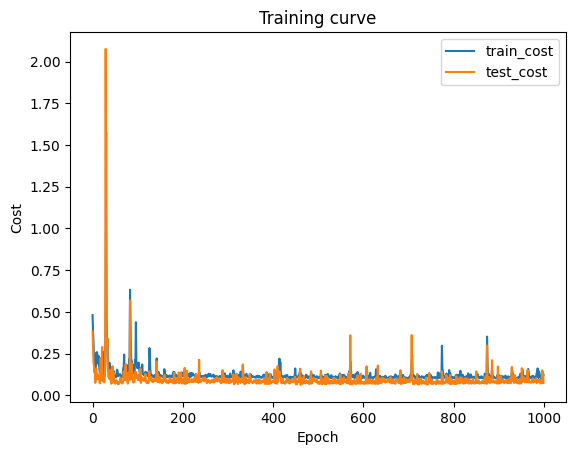

In [10]:
plt.figure()
plt.plot(history['train_costs'], label='train_cost')
if history.get('test_costs'):
    plt.plot(history['test_costs'], label='test_cost')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.legend()
plt.title('Training curve')
plt.show()

Visualize the decision boundary

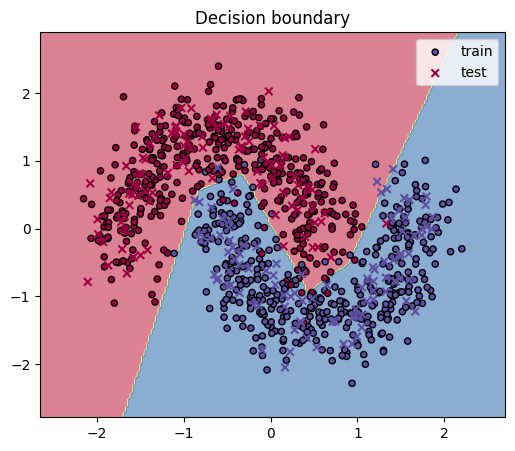

In [11]:
def plot_decision_boundary(model, X_raw, scaler, ax=None, grid_steps=200):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,5))
    # create mesh in scaled space
    Xs = scaler.transform(X_raw) if X_raw.ndim == 2 and X_raw.shape[1] == 2 else X_raw
    x_min, x_max = Xs[:,0].min() - .5, Xs[:,0].max() + .5
    y_min, y_max = Xs[:,1].min() - .5, Xs[:,1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_steps),
                          np.linspace(y_min, y_max, grid_steps))
    grid = np.c_[xx.ravel(), yy.ravel()].T   # shape (2, grid_pts)
    Z = model.predict(grid)                  # returns (1, N)
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.6)
    # plot train points (in original raw)
    ax.scatter(X_train_s[:,0], X_train_s[:,1], c=y_train_raw, cmap=plt.cm.Spectral, edgecolors='k', s=20, label='train')
    ax.scatter(X_test_s[:,0], X_test_s[:,1], c=y_test_raw, cmap=plt.cm.Spectral, marker='x', s=30, label='test')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title('Decision boundary')
    ax.legend()
    return ax

ax = plot_decision_boundary(model, X, scaler)
plt.show()